In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium.plugins import HeatMap

In [4]:
#import dataset
df = pd.read_csv("US_Accidents_May19.csv")

In [4]:
# number of columns and rows of this dataset
#2243939 rows and 49 columns
df.shape

(2243939, 49)

In [5]:
#column names
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
#data type for each column
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [11]:
#first 10 rows
df.head(10)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,MapQuest,201.0,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [37]:
#values in each columns
def valCol(df):
    for i in df.columns:
        print(i, df[i].unique())

In [38]:
valCol(df)

ID ['A-1' 'A-2' 'A-3' ... 'A-2243937' 'A-2243938' 'A-2243939']
Source ['MapQuest' 'MapQuest-Bing' 'Bing']
TMC [201. 241. 247. 246. 341. 406. 245. 248. 200. 244. 203. 229. 222. 202.
 206. 343. 236. 239. 336. 339. 351.  nan]
Severity [3 2 1 4 0]
Start_Time ['2016-02-08 05:46:00' '2016-02-08 06:07:59' '2016-02-08 06:49:27' ...
 '2017-08-30 19:48:10' '2017-08-30 20:01:40' '2017-08-30 20:49:40']
End_Time ['2016-02-08 11:00:00' '2016-02-08 06:37:59' '2016-02-08 07:19:27' ...
 '2017-08-31 01:48:10' '2017-08-31 02:01:40' '2017-08-31 02:49:40']
Start_Lat [39.865147 39.928059 39.063148 ... 36.748189 35.287398 35.100277]
Start_Lng [ -84.058723  -82.831184  -84.032608 ... -118.001665 -120.662498
 -120.117394]
End_Lat [      nan 40.11206  39.86501  ... 34.052779 35.29099  35.084546]
End_Lng [        nan  -83.03187   -84.04873  ... -118.001665 -120.65773
 -120.145096]
Distance(mi) [1.0000e-02 0.0000e+00 1.3200e+00 ... 9.4920e+00 3.1212e+01 9.4860e+00]
Description ['Right lane blocked due to accident

Wind_Direction ['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' nan]
Wind_Speed(mph) [  nan   3.5   4.6   1.2   5.8   2.3   6.9   8.1  10.4   9.2  11.5  13.8
  15.   12.7  19.6  21.9  18.4  25.3  16.1  24.2  23.   17.3  27.6  29.9
  20.7  26.5  31.1  33.4  28.8  35.7  42.6  36.8  32.2  40.3 142.7  73.6
  69.   38.   47.2  57.5  34.5 241.7 100.1 123.1 822.8  41.4 162.3  66.7
 126.6 127.7  39.1  54.1  97.8  76.  174.9  44.9  46.   49.5  43.7  77.1
  51.8 116.2 119.7 703.1  79.4  61.  254.3 110.5  50.6 124.3 328.  580.
 135.8 128.9  48.3 208.3  62.1 214.  125.4  58.7  81.7 166.9  85.2 471.8
 130.   59.8  99.  245.1 141.5]
Precipitation(in) [2.000e-02 0.000e+00       nan 3.000e-02 1.000e-02 7.000e-02 4.000e-02
 6.000e-02 1.800e-01 5.000e-02 1.600e-01 9.000e-02 1.000e-01 1.100e-01
 2.200e-01 8.000e-02 1.900e-01 1.500e-01 1.200e-01 1.400e-01 2.100e-01
 2.900e-01 1.300e-01 4.100e-01 2.000e-01 4.900e-01 3.100e-01 3.200e-01
 1

In [48]:
#any missing? 
def missing_in_col(df):
    for i in df.columns:
        print(i,sum(df[i].isna()))

In [49]:
missing_in_col(df)

ID 0
Source 0
TMC 516762
Severity 0
Start_Time 0
End_Time 0
Start_Lat 0
Start_Lng 0
End_Lat 1727177
End_Lng 1727177
Distance(mi) 0
Description 1
Number 1458402
Street 0
Side 0
City 68
County 0
State 0
Zipcode 646
Country 0
Timezone 2141
Airport_Code 23664
Weather_Timestamp 47170
Temperature(F) 62265
Wind_Chill(F) 1852370
Humidity(%) 64467
Pressure(in) 57280
Visibility(mi) 71360
Wind_Direction 47190
Wind_Speed(mph) 442954
Precipitation(in) 1979466
Weather_Condition 72004
Amenity 0
Bump 0
Crossing 0
Give_Way 0
Junction 0
No_Exit 0
Railway 0
Roundabout 0
Station 0
Stop 0
Traffic_Calming 0
Traffic_Signal 0
Turning_Loop 0
Sunrise_Sunset 78
Civil_Twilight 78
Nautical_Twilight 78
Astronomical_Twilight 78


In [119]:
def plot_map1(LatLong, city=None):
    accident_map = folium.Map(location=LatLong, tiles = "Stamen Toner", zoom_start = 10)
    if city != None:
        data_heatmap = df[df["City"] == city]
    else:
        data_heatmap = df.copy()
    data_heatmap = data_heatmap[['Start_Lat','Start_Lng']]
    data_heatmap = [[row['Start_Lat'],row['Start_Lng']] for index, row in data_heatmap.iterrows()]
    HeatMap(data_heatmap, radius=10).add_to(accident_map)
    return accident_map

In [120]:
df[df['City']=='New York'].shape

(5420, 49)

In [122]:
plot_map1([40.712776, -74.005974], city = 'New York')

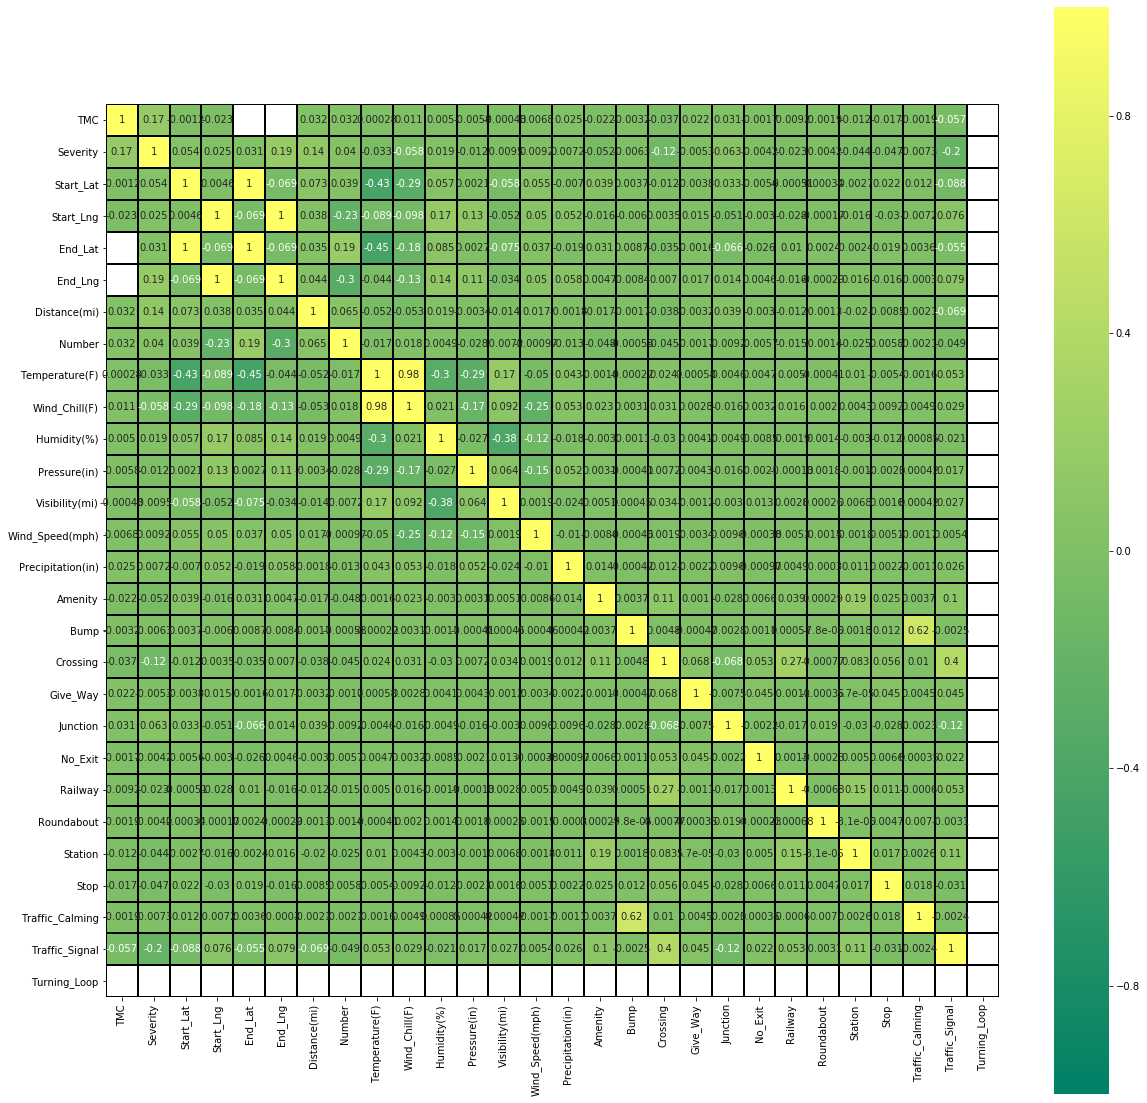

In [123]:
#correlation
#get current figure (gcf)
fig = plt.gcf()
fig.set_size_inches(20,20)
fig = sns.heatmap(df.corr(), annot=True, cmap='summer',linewidths=1, linecolor='k',square=True, mask=False, vmin=-1, vmax = 1, cbar_kws={"orientation":"vertical"},cbar=True)

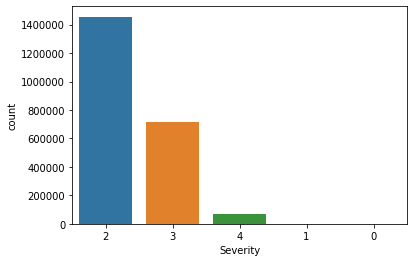

In [17]:
#Severity count of accident
sns.countplot('Severity', data = df, order = df['Severity'].value_counts().index)
plt.show()

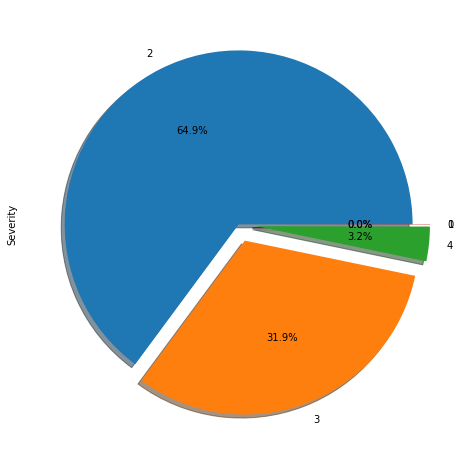

In [14]:
#severity percentage of accident
df['Severity'].value_counts().plot.pie(explode= [0,0.1,0.1,0.1,0.1], autopct = '%1.1f%%', shadow= True, figsize = (10,8))

In [22]:
#states
states = df['State'].unique()
print(states)

['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'TN' 'NC' 'MN' 'KS' 'OK' 'LA' 'CO' 'UT' 'AZ' 'NM' 'NV' 'VT' 'MS'
 'AR' 'MT' 'ME' 'ND' 'WY' 'ID' 'SD']


In [24]:
df.groupby('State')['ID'].nunique()

State
AL     22063
AR      1019
AZ     43411
CA    484706
CO     26916
CT     18708
DC      2558
DE      3124
FL    177490
GA     66637
IA      8336
ID      1352
IL     71701
IN     24162
KS      5486
KY     13765
LA     38143
MA     26096
MD     34315
ME      1580
MI     74045
MN     40000
MO     22481
MS      4586
MT       434
NC    108916
ND        37
NE     19328
NH      5593
NJ     40346
NM      3889
NV      7389
NY    105523
OH     46100
OK     36183
OR     42565
PA     75814
RI      8298
SC     99890
SD        44
TN     42464
TX    237637
UT     23212
VA     61426
VT       418
WA     50480
WI     12884
WV      1951
WY       438
Name: ID, dtype: int64

In [25]:
#count by states
by_state = []
for i in df['State'].unique():
    by_state.append(df[df['State']==i].count()['ID'])

In [26]:
by_state

[46100,
 1951,
 484706,
 177490,
 66637,
 99890,
 19328,
 8336,
 71701,
 22481,
 12884,
 24162,
 74045,
 40346,
 105523,
 18708,
 26096,
 8298,
 5593,
 75814,
 13765,
 34315,
 61426,
 2558,
 3124,
 237637,
 50480,
 42565,
 22063,
 42464,
 108916,
 40000,
 5486,
 36183,
 38143,
 26916,
 23212,
 43411,
 3889,
 7389,
 418,
 4586,
 1019,
 434,
 1580,
 37,
 438,
 1352,
 44]

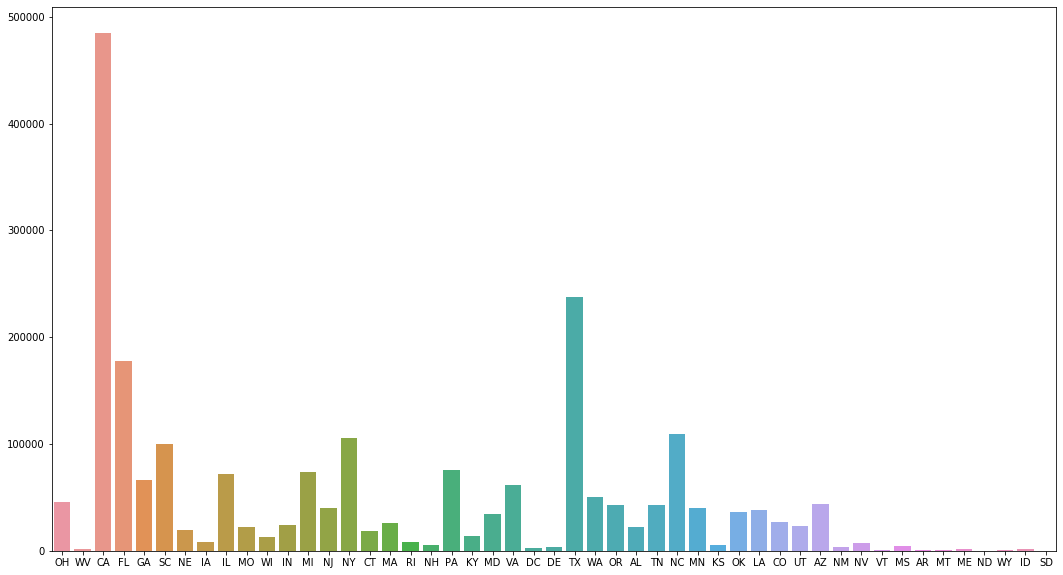

In [28]:
#barplot for the state accident counts
plt.figure(figsize = (18,10))
sns.barplot(states, by_state)